In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('C:/Users/VC/Downloads/Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
data=df.copy()

In [4]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
to_drop=['RowNumber','CustomerId','Surname']
data=data.drop(to_drop,axis=1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Converting Categorical Features We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [7]:
Gender = pd.get_dummies(data['Gender'],drop_first=True)
Geo = pd.get_dummies(data['Geography'],drop_first=True)

In [8]:
data.drop(['Gender','Geography'],axis=1,inplace=True)

In [9]:
data= pd.concat([data,Gender,Geo],axis=1)

In [10]:
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,1,0


Building a Logistic Regression model Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

In [11]:
# Standardise EstimatedSalary
data.EstimatedSalary.describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

In [12]:
data.EstimatedSalary=(data.EstimatedSalary-data.EstimatedSalary.mean())/data.EstimatedSalary.std()
data.EstimatedSalary

0       0.021885
1       0.216523
2       0.240675
3      -0.108912
4      -0.365258
          ...   
9995   -0.066416
9996    0.027987
9997   -1.008593
9998   -0.125224
9999   -1.076316
Name: EstimatedSalary, Length: 10000, dtype: float64

In [13]:
## standard estimated balance
data.Balance=(data.Balance-data.Balance.mean())/data.Balance.std()
data.Balance

0      -1.225786
1       0.117344
2       1.332987
3      -1.225786
4       0.785689
          ...   
9995   -1.225786
9996   -0.306363
9997   -1.225786
9998   -0.022606
9999    0.859922
Name: Balance, Length: 10000, dtype: float64

In [14]:
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Germany,Spain
0,619,42,2,-1.225786,1,1,1,0.021885,1,0,0,0
1,608,41,1,0.117344,1,0,1,0.216523,0,0,0,1
2,502,42,8,1.332987,3,1,0,0.240675,1,0,0,0
3,699,39,1,-1.225786,2,0,0,-0.108912,0,0,0,0
4,850,43,2,0.785689,1,1,1,-0.365258,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,-1.225786,2,1,0,-0.066416,0,1,0,0
9996,516,35,10,-0.306363,1,1,1,0.027987,0,1,0,0
9997,709,36,7,-1.225786,1,0,1,-1.008593,1,0,0,0
9998,772,42,3,-0.022606,2,1,0,-0.125224,1,1,1,0


In [15]:
#X = data[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary' ]] 
X=data.drop('Exited',axis=1)
y = data['Exited'] 

In [16]:
#X = data[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary' ]] 
X=data.drop('Exited',axis=1)
y = data['Exited'] 

In [17]:

from sklearn.model_selection import RepeatedKFold 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
kf = RepeatedKFold(n_splits=5, n_repeats=1, random_state=None) 
kf

RepeatedKFold(n_repeats=1, n_splits=5, random_state=None)

In [22]:
for train_index, test_index in kf.split(data):
   # print("Train:", train_index, "Validation:",test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index] 
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    logmodel=LogisticRegression(solver='liblinear')
    logmodel.fit(X_train,y_train)
    predict = logmodel.predict(X_test)
    print(roc_auc_score(y_test,predict))

0.5842235539343408
0.5967854804509879
0.5877637130801688
0.5911182895765102
0.5815047547233045


In [23]:
## predicting and  Training
from sklearn.linear_model import LogisticRegression

In [25]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\VC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
logmodel.coef_

array([[-0.00315168,  0.06117143, -0.04213629,  0.12157271, -0.19723224,
        -0.17843731, -1.07823809,  0.05662819, -0.58723855,  0.816241  ,
        -0.0957613 ]])

In [27]:
predictions = logmodel.predict(X_test) 
#predictions = logmodel.predict_proba(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [28]:
pd.crosstab(predictions,y_test)

Exited,0,1
row_0,,
0,1575,290
1,60,75


In [29]:
### evalution , we have to chech f1  score and precision
from sklearn.metrics import classification_report,confusion_matrix

In [30]:
print(classification_report(y_test,logmodel.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      1635
           1       0.56      0.21      0.30       365

    accuracy                           0.82      2000
   macro avg       0.70      0.58      0.60      2000
weighted avg       0.79      0.82      0.79      2000



In [31]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, predictions)
logit_roc_auc

0.5843911021741862

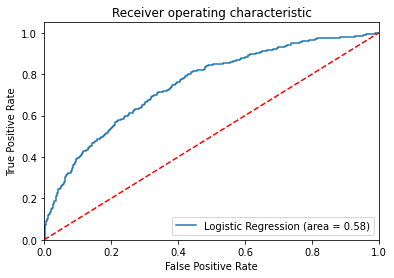

In [32]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, predictions)
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [33]:
roc_auc_score(y_test, logmodel.predict(X_test))

0.5843911021741862

In [34]:
logmodel.predict_proba(X_test)

array([[0.6300173 , 0.3699827 ],
       [0.95819521, 0.04180479],
       [0.81054982, 0.18945018],
       ...,
       [0.75482594, 0.24517406],
       [0.85649666, 0.14350334],
       [0.91657821, 0.08342179]])

In [35]:
logmodel.predict_proba(X_test)[:,1]

array([0.3699827 , 0.04180479, 0.18945018, ..., 0.24517406, 0.14350334,
       0.08342179])

In [36]:
logmodel.predict_proba(X_test)[:,1]>0.4

array([False, False, False, ..., False, False, False])

In [37]:
logical=logmodel.predict_proba(X_test)[:,1]>0.21
logical

array([ True, False, False, ...,  True, False, False])

In [38]:
pred=[0]*np.size(logical)
for i in np.arange(0,np.size(logical)):
        if logical[i]==True:
            pred[i]=1  

In [39]:
roc_auc_score(y_test,pred)

0.6793598927569017

In [40]:
print(confusion_matrix(y_test,pred))

[[1133  502]
 [ 122  243]]


In [41]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.90      0.69      0.78      1635
           1       0.33      0.67      0.44       365

    accuracy                           0.69      2000
   macro avg       0.61      0.68      0.61      2000
weighted avg       0.80      0.69      0.72      2000



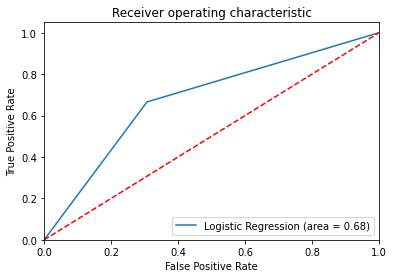

In [42]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, pred)
fpr, tpr, thresholds = roc_curve(y_test, pred)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()